This notebook was made to compare magnitude of bacground vertical eddy viscosity and that produced by GLS at Sandheads, VENUS nodes. Two simulations from October 8-10 was performed with all the same conditions except background vertical viscosity.

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import (nc_tools,viz_tools,tidetools)
import seaborn as sns
import os
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
SITES = {
    'Sandheads': {
        'lat': 49.10,
        'lon': -123.30,
        'i' : 426,
        'j' : 293
   
    },
    'VENUS East':{
        'lat' : 49.0419,
        'lon' : -123.3176,
        'depth' : 170,
        'i' : 416,
        'j' : 283
    },    
    'VENUS Central': {
        'lat': 49.0401,
        'lon': -123.4261,
        'depth' : 300,
        'i': 424,
        'j': 266
        },

    'VENUS Delta': {
        'lat': 49.0807167,
        'lon': -123.3400617,
        'i':  425,
        'j':284
    },
    'S4-3':{
        'lat': 49.25 ,
        'lon':  -123.375,
        'i':461,
        'j': 300
        
    },

        }

In [3]:
runs=['oct8_10test1e-05','oct8_10test1e-04']
base='/data/jieliu/MEOPAR/river-treatment/'
sals={}; depths={}; avms={}; avds={}; Ws={};depthws={}; Us={}; Vs={}
grid = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
bathy=grid.variables['Bathymetry']
for run in runs:
    path = os.path.join(base,'{}/SalishSea_1h_20141008_20141010_grid_T.nc'.format(run))
    f = nc.Dataset(path,'r');
    sals[run]=f.variables['vosaline']
    depths[run] = f.variables['deptht'] 
    T_lat = f.variables['nav_lat']
    T_lon = f.variables['nav_lon']

    #Loading eddy viscosity/diffusivity data on the vertical grid
    path = os.path.join(base,'{}/SalishSea_1h_20141008_20141010_grid_W.nc'.format(run))
    f = nc.Dataset(path,'r');
    avms[run]=f.variables['ve_eddy_visc']
    avds[run]= f.variables['ve_eddy_diff'] #
    Ws[run]=f.variables['vovecrtz']
    depthws[run] = f.variables['depthw']
    #Loading data on the ugrid
    path = os.path.join(base,'{}/SalishSea_1h_20141008_20141010_grid_U.nc'.format(run))
    f = nc.Dataset(path,'r');
    Us[run]=f.variables['vozocrtx']
    #Loading data on the ugrid
    path = os.path.join(base,'{}/SalishSea_1h_20141008_20141010_grid_V.nc'.format(run))
    f = nc.Dataset(path,'r');
    Vs[run]=f.variables['vomecrty']

In [4]:
bg = {runs[0]: {'visc': 1e-5, 'diff': 1e-5},
      runs[1]: {'visc': 1e-4, 'diff': 1e-5}
      }

In [5]:
def compare_visc_diff(j, i,station,zmin=0, zmax=50, xmin=-7,xmax=-2):
    """Compare vertical eddy diff and viscosity at time t and gridpoint (i,j)"""
    
    colors=['b','g']
    fig, axs = plt.subplots(1,2,figsize=(15,3))
    for run, c in zip(runs, colors):
        #diff
        title = ' Diffusivity averaged over 3 days with hourly results - {}'.format( station )
        ax=axs[0]
        avd=avds[run][:,:,j,i]
        avd=np.nanmean(np.ma.masked_values(avd,0),axis=0)
        ax.plot(np.log10(avd),depthws[run],'-o',label=run,color=c)
        ax.plot(np.log10([bg[run]['diff'], bg[run]['diff']]), [depthws[run][0], depthws[run][-1]],
                '--', color=c, label='background')
        ax.set_xlabel('Log base 10 of diffusivity (m^2/s)')
        ax.set_title(title)
        
        #visc
        title = ' Viscosity averaged over 3 days with hourly results  - {}'.format(station )
        ax=axs[1]
        avm=avms[run][:,:,j,i]
        avm=np.nanmean(np.ma.masked_values(avm,0),axis=0)
        ax.plot(np.log10(avm),depthws[run],'-o',label=run,color=c)
        ax.plot(np.log10([bg[run]['visc'], bg[run]['visc']]), [depthws[run][0], depthws[run][-1]],
                '--', color=c, label='background')
        ax.set_xlabel('Log base 10 of Viscosity (m^2/s)')
        ax.set_title(title)

    for ax in axs:
        ax.legend(loc=0)
        ax.set_ylabel('Depth [m]')
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([zmax,zmin])
    
    return fig

* Blue is run[0]: diffusivity = 1e-5, viscosity = 1e-5
* Green is run[1]: diffusivity = 1e-5,viscosity = 1e-4

* Sandheads

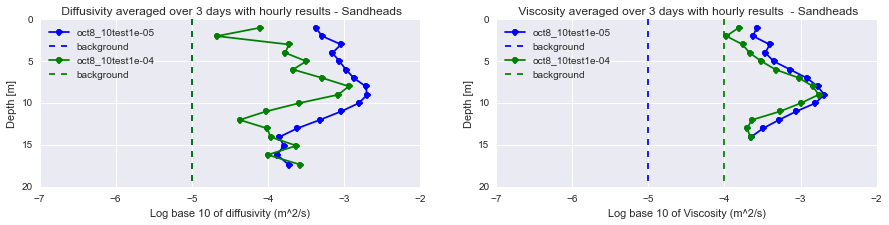

In [6]:
site='Sandheads'
fig =compare_visc_diff(SITES[site]['i'], SITES[site]['j'],site,zmin=0, zmax=20)

Both viscosity and diffusivity has been activated at Sandheads for all depths. GLS is dominated at Sandheads.

* VENUS Central

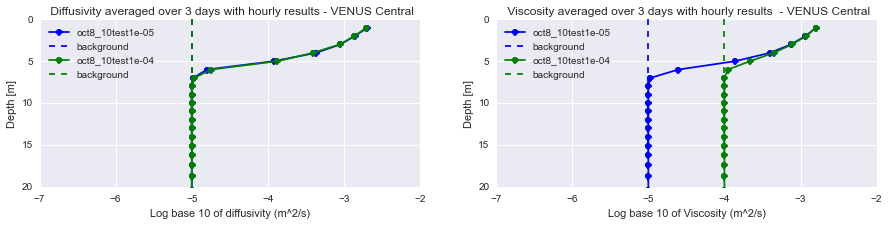

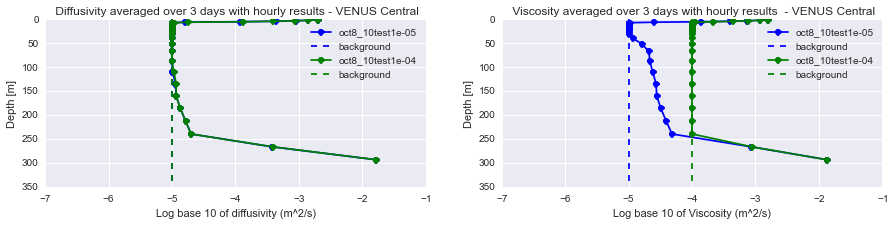

In [7]:
site='VENUS Central'
fig =compare_visc_diff(SITES[site]['i'], SITES[site]['j'],site,zmin=0, zmax=20)
fig =compare_visc_diff(SITES[site]['i'], SITES[site]['j'],site, zmin=0, zmax=350,xmin=-7,xmax=-1)

 Diffusivity within these two runs behave almost the same for all depths at Central. GLS is primary in the upper 7m for both visocsity and diffusivity. Lower viscosity case was also dominated below 50m while higher one was dominated below 250m.

* VENUS East

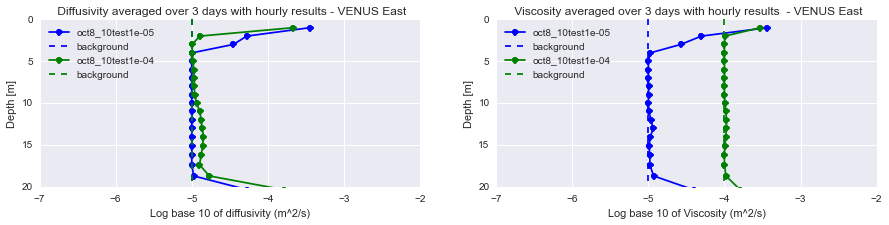

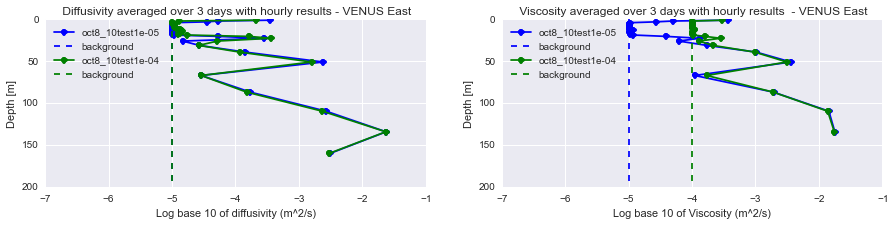

In [8]:
site='VENUS East'
fig =compare_visc_diff(SITES[site]['i'], SITES[site]['j'],site,zmin=0, zmax=20)
fig =compare_visc_diff(SITES[site]['i'], SITES[site]['j'],site, zmin=0, zmax=200,xmin=-7,xmax=-1)

Lower viscosity was primary dominated in the upper 4m and below 20m while higher one is in the upper 3m and between 20~60 and below 60m.

* VENUS Delta

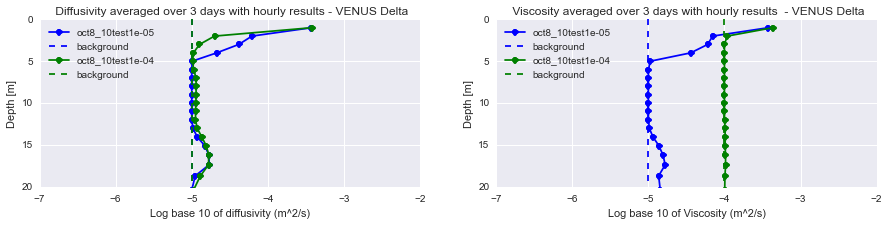

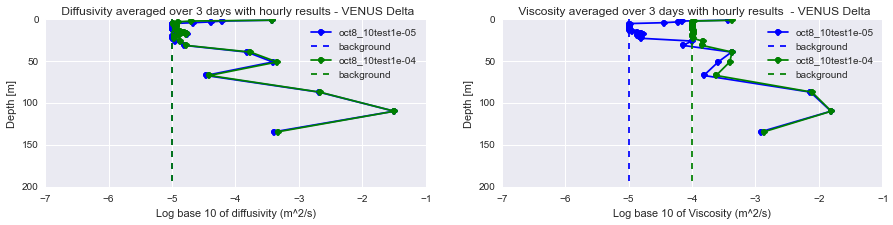

In [9]:
site='VENUS Delta'
fig =compare_visc_diff(SITES[site]['i'], SITES[site]['j'],site,zmin=0, zmax=20)
fig =compare_visc_diff(SITES[site]['i'], SITES[site]['j'],site, zmin=0, zmax=200,xmin=-7,xmax=-1)

Similar variability with East one.

* S4-3

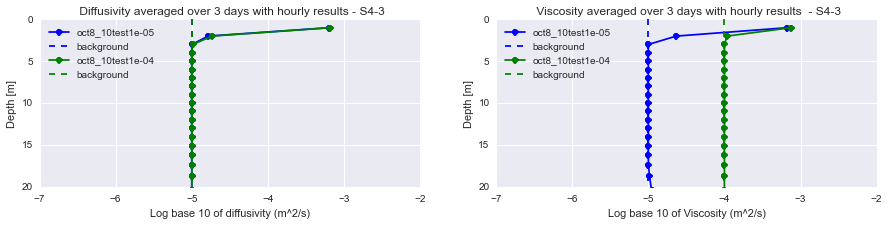

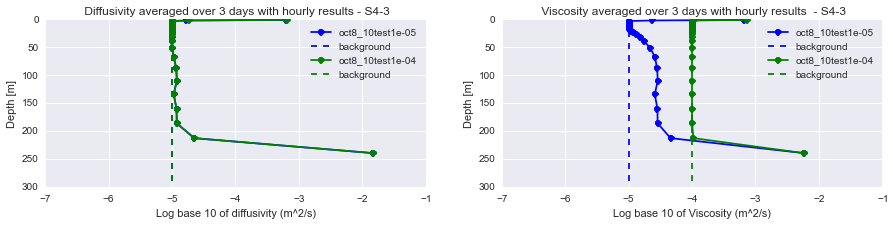

In [10]:
site='S4-3'
fig =compare_visc_diff(SITES[site]['i'], SITES[site]['j'],site,zmin=0, zmax=20)
fig =compare_visc_diff(SITES[site]['i'], SITES[site]['j'],site, zmin=0, zmax=300,xmin=-7,xmax=-1)

 Lower viscosity dominated in the upper 4m and below 20m, while higher one has smaller dominated depth range.